In [1]:
from MORL_analysis_utils import  plot_grouped_bar_plot, plot_total_sums

from MO_PPO_train_utils import load_saved_data
import itertools
from MORL_analysis_utils import generate_variable_name
from MORL_analysis_utils import plot_multiple_subplots
import itertools
import numpy as np

c:\Users\thoma\anaconda3\envs\TOPGRID_MORL\Lib\site-packages\grid2op\Backend\pandaPowerBackend.py:32: UserWarning: Numba cannot be loaded. You will gain possibly massive speed if installing it by 
	c:\Users\thoma\anaconda3\envs\TOPGRID_MORL\python.exe -m pip install numba

  warnings.warn(


In [24]:
num_episodes_list = [5]
weights_list = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]
results_dir = "training_results"

In [22]:
loaded_data = {}
# Loop through all combinations of num_episodes and weights
for num_episodes, weights in itertools.product(num_episodes_list, weights_list):
    # Load the reward matrix and actions
    reward_matrix, actions, total_steps, params = load_saved_data(weights=weights, results_dir=results_dir, num_episodes=num_episodes)
    
    # Generate variable names based on the specifications
    reward_var_name = generate_variable_name("reward_matrix", num_episodes, weights)
    actions_var_name = generate_variable_name("actions", num_episodes, weights)
    total_steps_var_name = generate_variable_name("total_steps", num_episodes, weights)
    
    # Store the data in the dictionary
    loaded_data[reward_var_name] = reward_matrix
    loaded_data[actions_var_name] = actions
    loaded_data[total_steps_var_name] = total_steps


# Access the loaded data using the generated variable names
#for key in loaded_data.keys():
#    print(f"{key}: {loaded_data[key]}")

KeyError: 'total_steps is not a file in the archive'

In [23]:
loaded_data

{}

In [5]:
actions

array([[ 27, 100,  96,  91],
       [180,  27, 131,  75],
       [162, 134,   0,   0],
       [123,   0,   0,   0],
       [ 77, 139,   0,   0]], dtype=int64)

In [6]:
reward_matrix

array([[ 4.96031746e-04,  1.31792209e+00, -2.22044605e-16],
       [ 4.96031746e-04,  1.49117786e+00,  6.00000000e-01],
       [ 2.48015873e-04,  5.90227127e-01, -3.00000000e-01],
       [ 1.24007937e-04,  0.00000000e+00, -1.00000000e+00],
       [ 2.48015873e-04,  5.69727039e-01, -5.00000000e-01]])

In [14]:
def normalize_reward_matrix(reward_matrix, EpisodeDuration=True):
    normalized_reward_matrix = reward_matrix / total_steps[:, np.newaxis]
    if EpisodeDuration: 
        normalized_reward_matrix[:,0] = reward_matrix[:,0]
    return normalized_reward_matrix

In [19]:
reward_matrices = [normalize_reward_matrix(loaded_data['reward_matrix_episodes_5_weights_1_0_0']), normalize_reward_matrix(loaded_data['reward_matrix_episodes_5_weights_0_1_0']), normalize_reward_matrix(loaded_data['reward_matrix_episodes_5_weights_0_0_1'])]

settings for loading the files

2.6000000000000005 2.325368446989491 1.9444444444444444
2.666666666666667 2.242621871219268 3.046875
2.666666666666667 3.439568426410985 3.2608695652173916


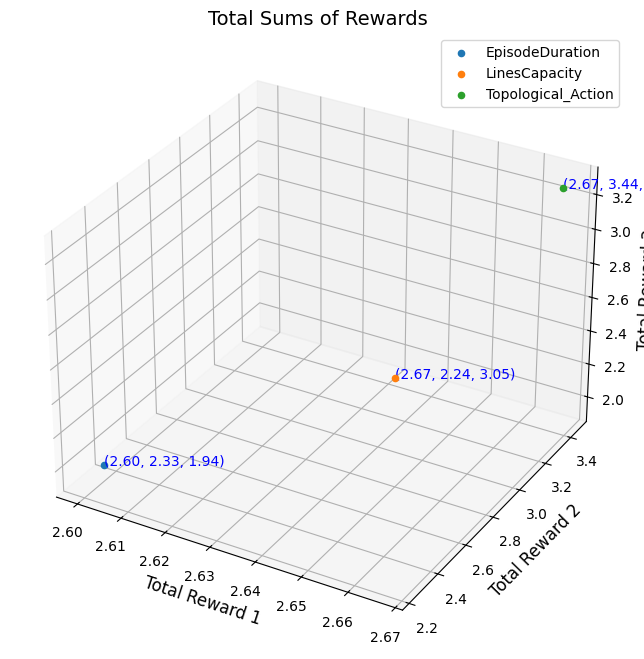

In [20]:
plot_total_sums(reward_matrices=reward_matrices, labels=['EpisodeDuration', 'LinesCapacity', 'Topological_Action'])

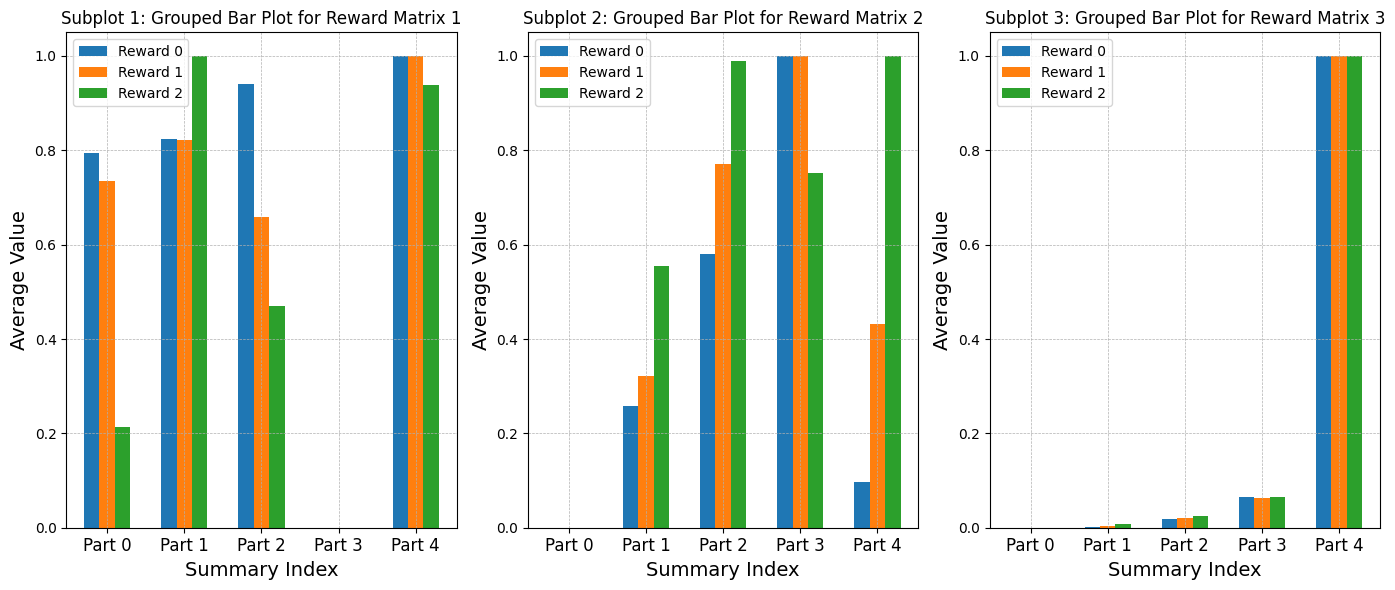

In [8]:
plot_multiple_subplots(reward_matrices=[loaded_data['reward_matrix_episodes_500_weights_1_0_0'],loaded_data['reward_matrix_episodes_500_weights_0_1_0'],loaded_data['reward_matrix_episodes_500_weights_0_0_1'] ], summed_episodes=100)